In [8]:
import pandas as pd 
import numpy as np
from scipy import stats

df=pd.read_csv('bi.csv',encoding='ISO-8859-1')
df.shape

(77, 11)

In [9]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [11]:
df=df.dropna()

In [12]:
Q1=np.percentile(df[['Age','entryEXAM','studyHOURS','Python','DB']],25)
Q3=np.percentile(df[['Age','entryEXAM','studyHOURS','Python','DB']],75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=[(df[['Age','entryEXAM','studyHOURS','Python','DB']] < lower_bound) | (df[['Age','entryEXAM','studyHOURS','Python','DB']] > upper_bound)]
print(outliers)

[      Age  entryEXAM  studyHOURS  Python     DB
0   False      False        True   False  False
1   False      False       False   False  False
2   False      False       False   False  False
4   False      False       False   False  False
5   False      False       False   False  False
..    ...        ...         ...     ...    ...
72  False      False       False   False  False
73  False      False        True   False  False
74  False      False        True   False  False
75  False      False        True   False  False
76  False      False       False   False  False

[75 rows x 5 columns]]


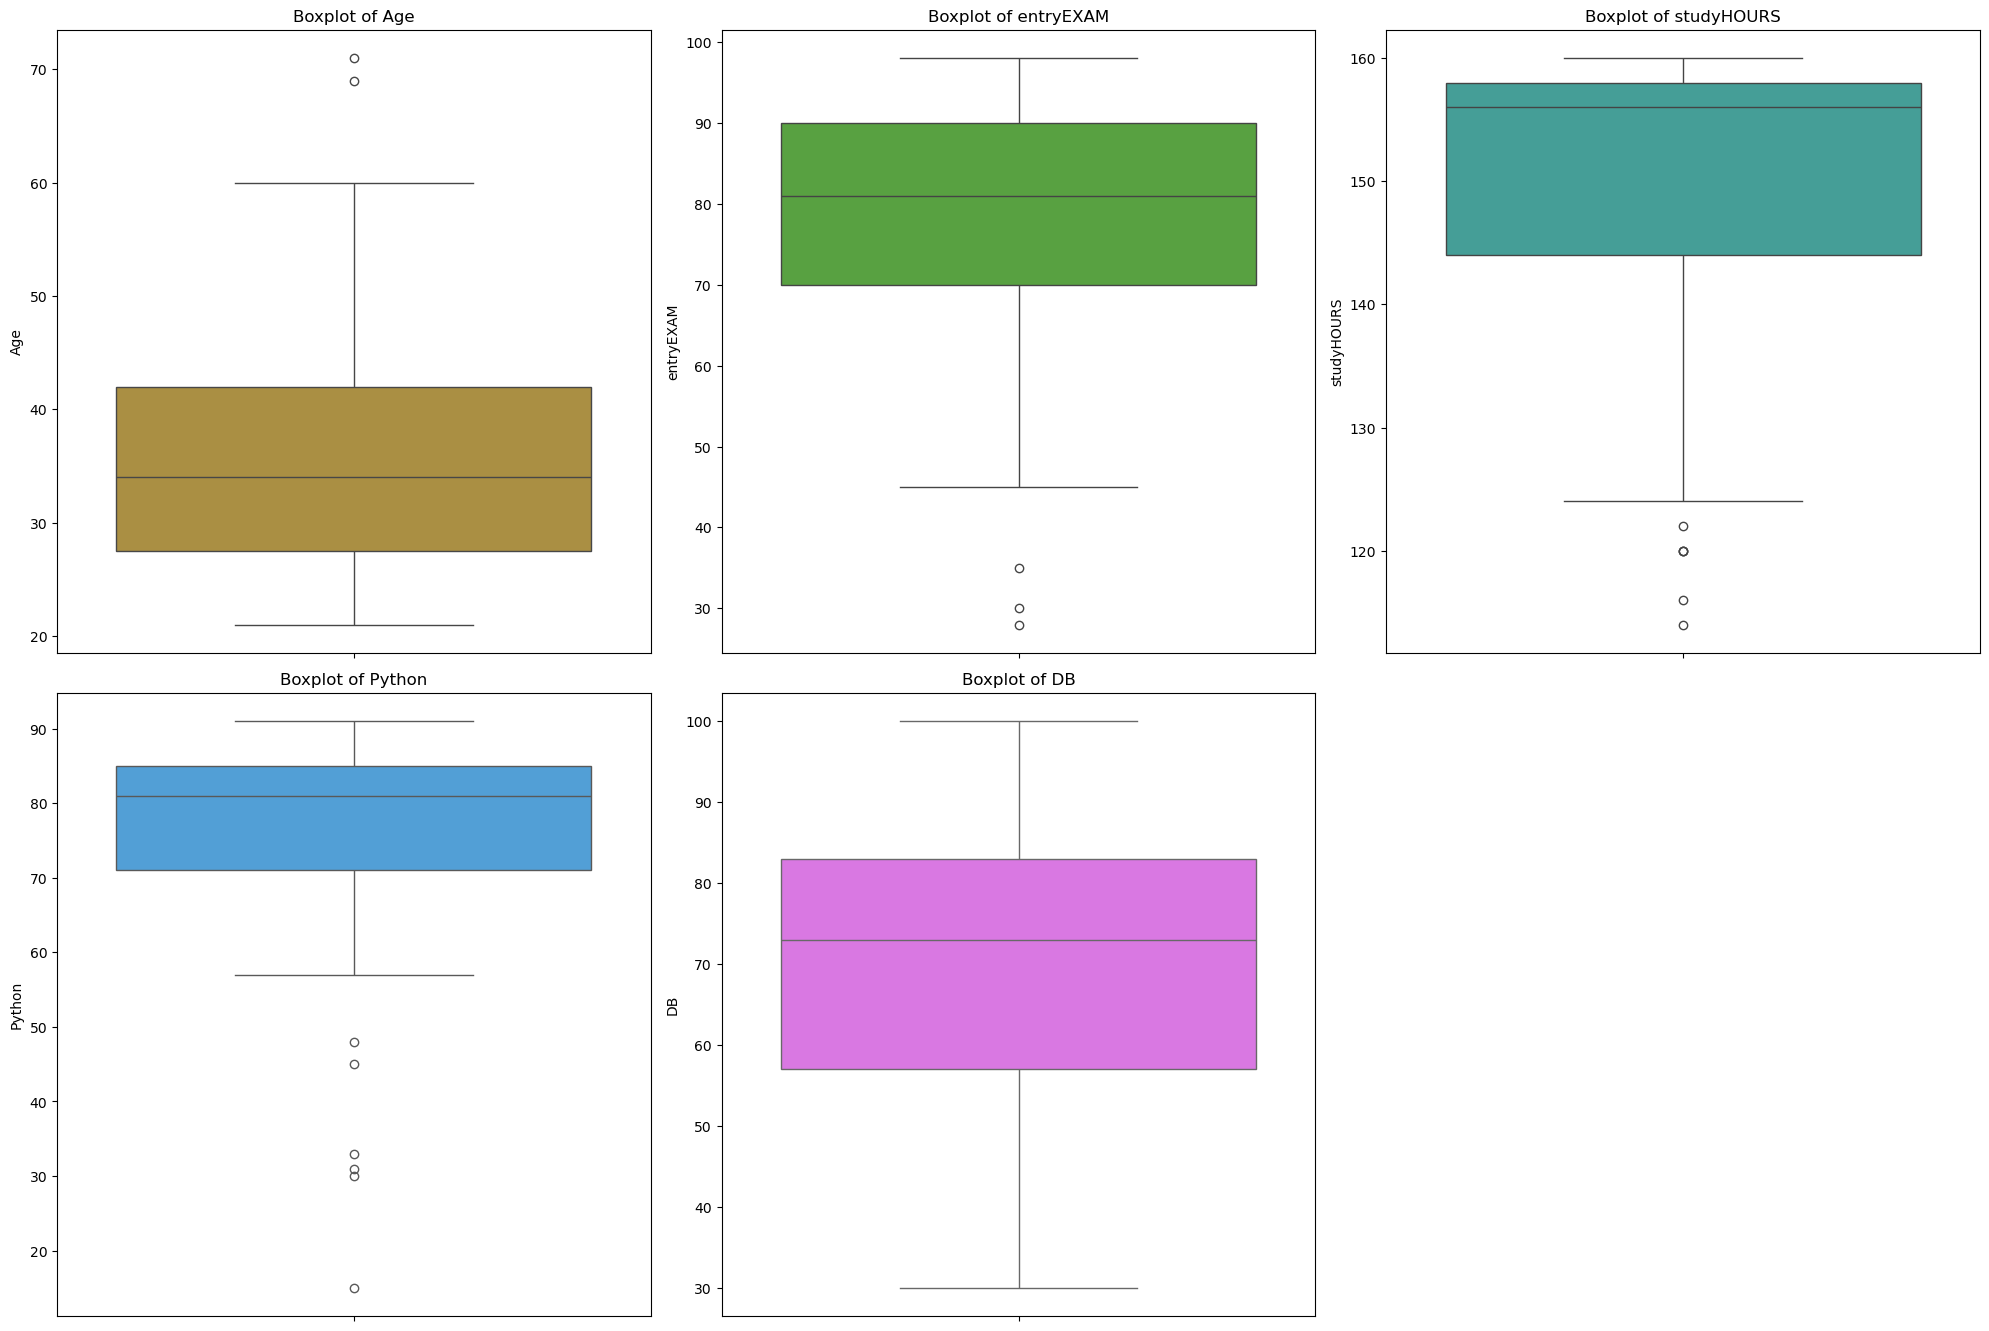

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define color palette
palette = sns.color_palette("husl")

#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()    




In [15]:
df['gender'] = df['gender'].replace({'M': 'Male','F': 'Female'})
df['gender'] = df['gender'].replace({'male': 'Male','female': 'Female'})
df['residence'] = df['residence'].str.replace(r'[\s\-_]', '', regex=True)
df['prevEducation'] = df['prevEducation'].replace({'Diplomaaa': 'Diploma'})
df['prevEducation'] = df['prevEducation'].str.replace(r'(?i)^Highschool$', 'High School', regex=True)
# Alignment of letters
df['country'] = df['country'].str.strip().str.title() 
df['residence'] = df['residence'].str.strip().str.title() 
df['prevEducation'] = df['prevEducation'].str.strip().str.title() 

df.sample(4)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
62,Caroline,Narocho,23,Female,Norway,Biresidence,90,High School,160,87.0,73
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43


In [18]:
#EDA

df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,75.000000,75.000000,75.00000,75.000000,75.000000
mean,35.546667,77.360000,150.08000,75.853333,69.800000
std,10.264467,16.097373,12.43552,15.410328,17.003179
min,21.000000,28.000000,114.00000,15.000000,30.000000
25%,27.500000,70.000000,144.00000,71.000000,57.000000
50%,34.000000,81.000000,156.00000,81.000000,73.000000
75%,42.000000,90.000000,158.00000,85.000000,83.000000
max,71.000000,98.000000,160.00000,91.000000,100.000000
